In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads/Expanded_data_with_more_features.csv.zip")

In [4]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
df.shape

(30641, 15)

In [7]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
df=df.drop("Unnamed: 0",axis=1)

In [12]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Data Analysis

### Gender Distribution

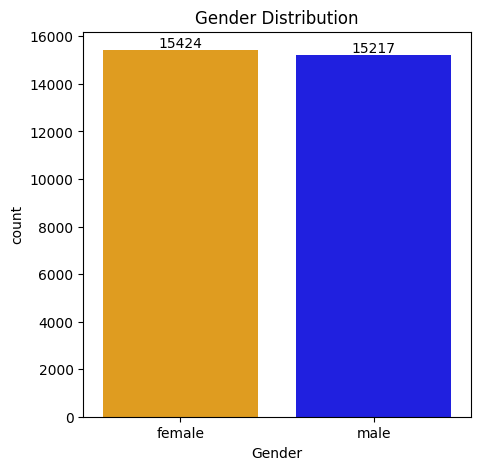

In [21]:
plt.figure(figsize=(5,5))
custom_colors = ["orange", "blue"]
ax = sns.countplot(data=df,x="Gender",hue="Gender",palette=custom_colors,legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gender Distribution")
plt.show()

In [14]:
#from the above chart we have analysed that:
#The number of females in the data is more than the number of males

### Parent's Education impact

In [15]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


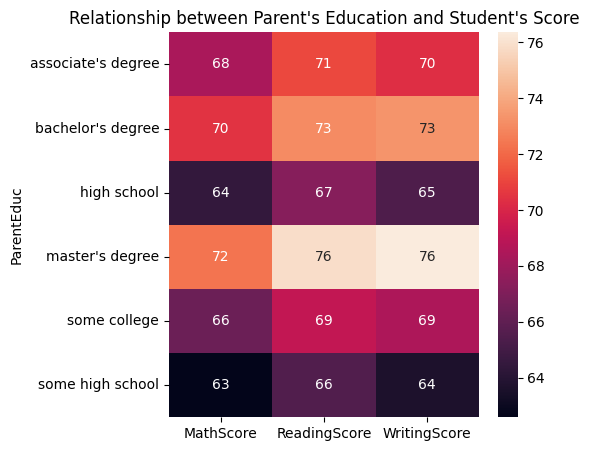

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

In [17]:
#from the above chart we have analysed that:
#Parent's education have an impact on their kid's scores

### Parent's Marital Status impact

In [18]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


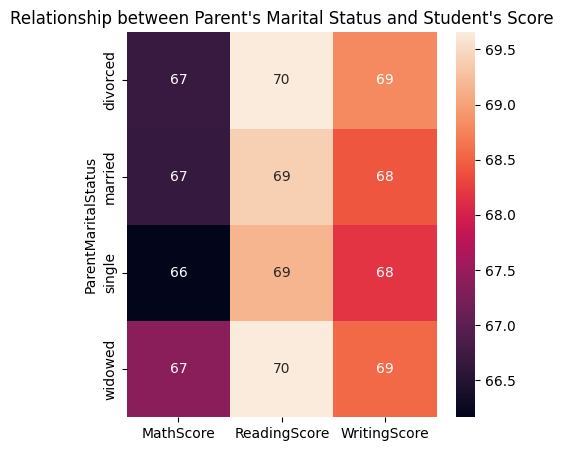

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

In [20]:
#from the above chart we have analysed that:
#there is no/negligible impact on student's score due to their parent's marital status

### Outliers

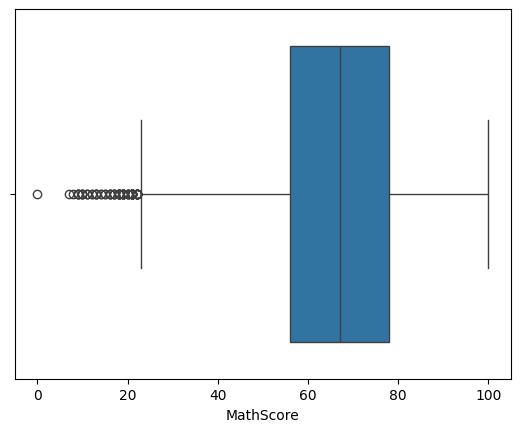

In [24]:
sns.boxplot(data=df, x='MathScore')
plt.show()

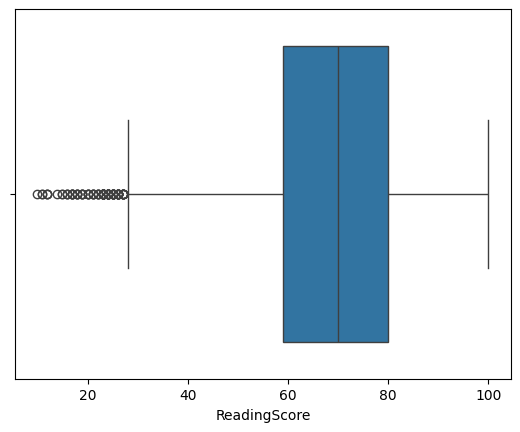

In [25]:
sns.boxplot(data=df, x='ReadingScore')
plt.show()

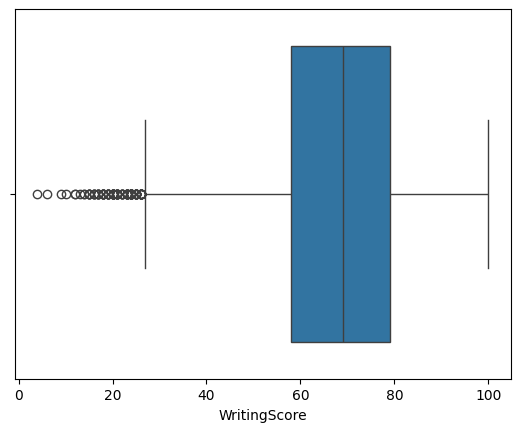

In [26]:
sns.boxplot(data=df, x='WritingScore')
plt.show()

In [27]:
#from the above charts we have analysed that:
#The students are weak in maths as compared to other subjects and
#there are many outliers in all the three subjects but math is the only subject where outliers is present at 0.

### Sports Practice impact

In [28]:
gb2=df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


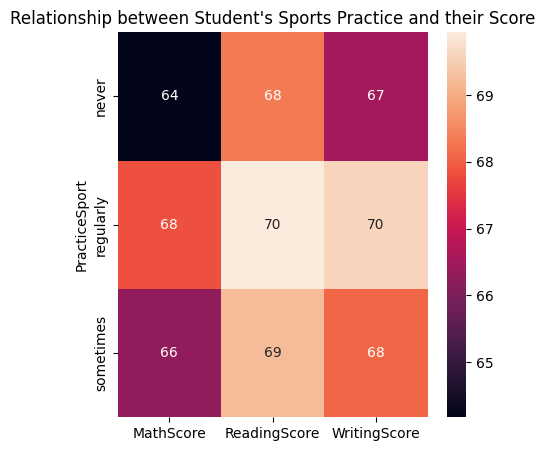

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot=True)
plt.title("Relationship between Student's Sports Practice and their Score")
plt.show()

In [30]:
#from the above chart we have analysed that:
#there is no/negligible impact on student's score due to their sports practice.

### Weekly Study Hours impact

In [31]:
gb3=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


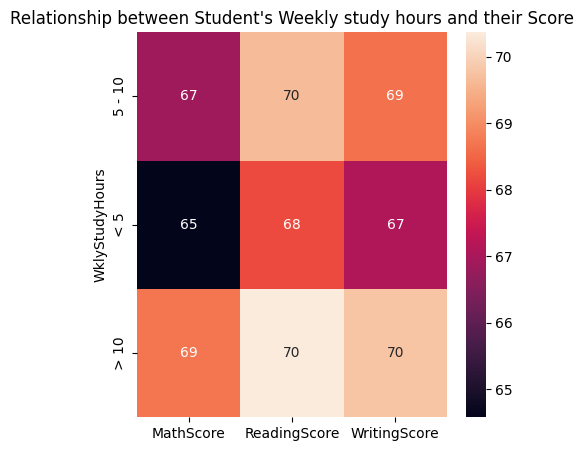

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(gb3,annot=True)
plt.title("Relationship between Student's Weekly study hours and their Score")
plt.show()

In [35]:
#from the above chart we have analysed that:
#as the number of study hours increases, there is a slight increase in the average scores across all subjects. 
#This suggests that there is a positive correlation between study hours and academic performance.
#However, it is not sufficient to conclude a direct causal relationship.

### Ethnic Group 

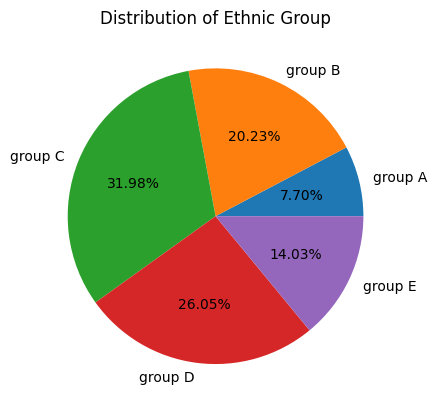

In [38]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE= df.loc[(df['EthnicGroup'] == 'group E')].count()

l=['group A','group B','group C','group D','group E']
myList=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]

plt.pie(myList , labels=l,autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

In [39]:
gb4=df.groupby("EthnicGroup").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


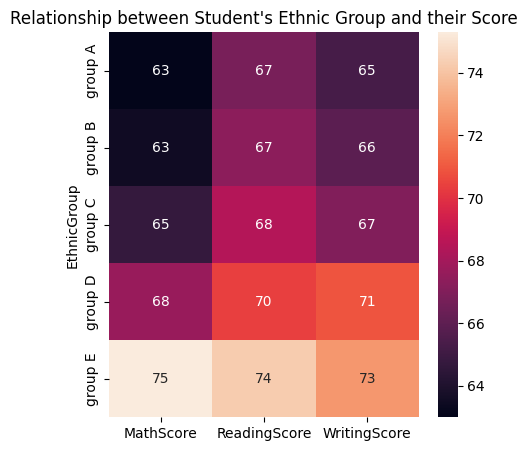

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(gb4,annot=True)
plt.title("Relationship between Student's Ethnic Group and their Score")
plt.show()

In [ ]:
#from the above chart we have analysed that:
#Ethnicity of a student do have an impact on their marks to some extent.